In [1]:
import db_logger
import matplotlib.pyplot as plt
import glob, pathlib
import ipywidgets as widgets
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [6]:

logger =  db_logger.DB_Logger("/mnt/data/arty/data/gan_sampling/baseline.db", connect_only=True)
name2id = {}
for id in logger.get_experiment_ids():
    name2id[logger.get_experiment_name(id)] = id
    print(logger.get_experiment_name(id))

Connecting to existing database at /mnt/data/arty/data/gan_sampling/baseline.db
FashionMNIST_rlvl1_bTrue_aug_True
CIFAR10_rlvl1_bTrue_aug_True
BreastMNIST_rlvl1_bTrue_aug_True
PathMNIST_rlvl1_bTrue_aug_True
OrganCMNIST_rlvl1_bTrue_aug_True
BloodMNIST_rlvl1_bTrue_aug_True
MNIST_rlvl1_bTrue_aug_True
DermaMNIST_rlvl1_bTrue_aug_True
RetinaMNIST_rlvl1_bTrue_aug_True


interactive(children=(Dropdown(description='exp1', options=('FashionMNIST_rlvl1_bTrue_aug_True', 'CIFAR10_rlvl…

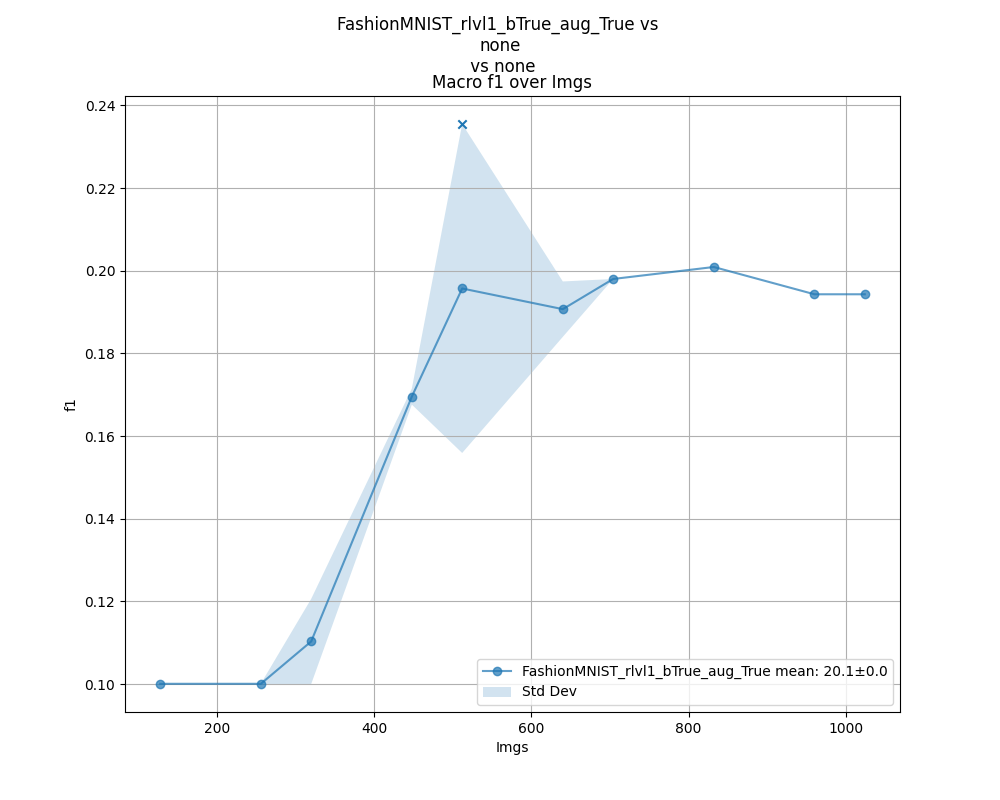

In [8]:
r1, r2, r3 = None, None, None
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
@widgets.interact(
        exp1=[logger.get_experiment_name(x) for x in logger.get_experiment_ids()], 
        exp2=["none"]+[logger.get_experiment_name(x) for x in logger.get_experiment_ids()], 
        exp3=["none"]+[logger.get_experiment_name(x)for x in logger.get_experiment_ids()],
        metric=["f1", "acc", "precision", "recall"])
def display_content(exp1, exp2, exp3, metric):
    name2id = {}
    for id in logger.get_experiment_ids():
        name2id[logger.get_experiment_name(id)] = id
    global r1, r2, r3
    print(f"Working ...", end="")
    ax.clear()
    fig.suptitle(f"{exp1} vs \n{exp2}\n vs {exp3}")
    r1 = db_logger.plot_metric(logger, [name2id[exp1]], metric=metric, ax=ax, prefix='')
    if exp2 != "none":
        r2 = db_logger.plot_metric(logger, [name2id[exp2]], metric=metric, ax=ax, prefix='1-')
    if exp3 != "none":
        r3 = db_logger.plot_metric(logger, [name2id[exp3]], metric=metric, ax=ax, prefix='2-')
    print(f"\rDone       ")